# Sampling Novel Body Poses from VPoser
![alt text](https://github.com/nghorbani/human_body_prior/raw/845ad715b82bbd1a4e4772b23a0b7e4cd92203c6/github_data/latent_interpolation_1.gif "Interpolation of novel poses on the smoother VPoser latent space.")

You can use VPoser to produce novel random poses. 
This generative model can be potentially used as a synthetic data generator to train other models.

For this you would need to first obtain a trained VPoser from https://smpl-x.is.tue.mpg.de/downloads .
Put the obtained model in a folder, here we assume 

'GITHUB_CLONE_ROOT/human_body_prior/support_data/dowloads/vposer_vXX', 

and afterwards you can use the following code snippet to sample new poses: 

In [7]:
# Set up environment
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

import torch
import numpy as np

from body_visualizer.tools.vis_tools import render_smpl_params
from body_visualizer.tools.vis_tools import imagearray2file
from notebook_tools import show_image

In [1]:
#This tutorial requires 'vposer_v2_05'

from os import path as osp
support_dir = '../support_data'
expr_dir = osp.join(support_dir,'dowloads/vposer_v2_05') #'TRAINED_MODEL_DIRECTORY'  in this directory the trained model along with the model code exist
bm_path =  osp.join(support_dir,'dowloads/models/smplx/neutral/model.npz')#'PATH_TO_SMPLX_model.npz'  obtain from https://smpl-x.is.tue.mpg.de/downloads

print(expr_dir)
print(bm_path)

../support_data/dowloads/vposer_v2_05
../support_data/dowloads/models/smplx/neutral/model.npz


In [2]:
#Loading SMPLx Body Model
from human_body_prior.body_model.body_model import BodyModel

bm = BodyModel(bm_path=bm_path).to('cuda')

In [3]:
#Loading VPoser Body Pose Prior
from human_body_prior.tools.model_loader import load_model
from human_body_prior.models.vposer_model import VPoser
vp, ps = load_model(expr_dir, model_code=VPoser,
                              remove_words_in_model_weights='vp_model.',
                              disable_grad=True)
vp = vp.to('cuda')

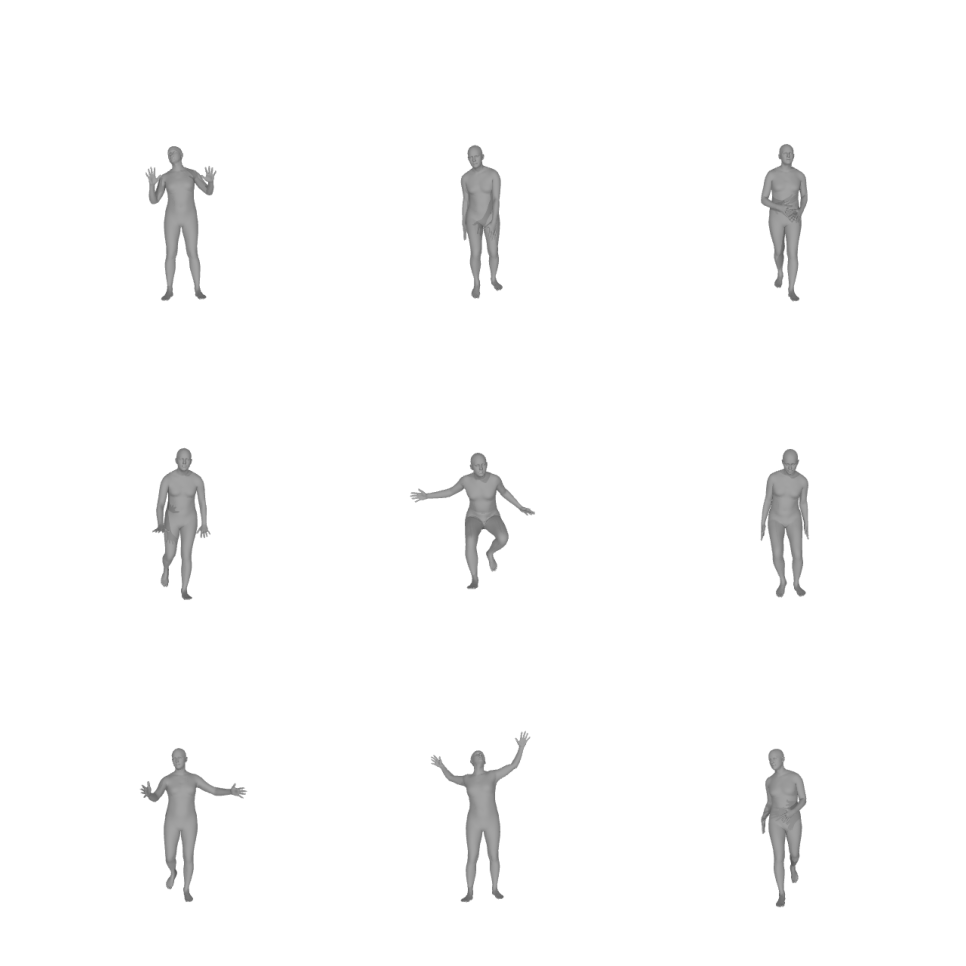

In [19]:
num_poses = 9 # number of body poses in each batch

sampled_pose_body = vp.sample_poses(num_poses=num_poses)['pose_body'].contiguous().view(num_poses, -1) # will a generate Nx1x21x3 tensor of body poses 
images = render_smpl_params(bm, {'pose_body':sampled_pose_body}).reshape(3,3,1,400,400,3)
img = imagearray2file(images)
show_image(np.array(img[0]))

The each column of the first row of the above image are the novel poses, and the following rows are varied rotations for demonstration purpose
so that you can see the generated body from different angles.

# VPoser Latent Space Interpolation
You can go one stap further and investigate the smoothness of the latent space of VPoser. 
To do this you sample two poses poZ<sub>1</sub> and poZ<sub>2</sub> and then use &alpha; &in; [0.,1.] to change the influence 
of each on the interpolated poZ<sub>inp</sub>, e.g.
 
poZ<sub>inp</sub> = &alpha; * poZ<sub>1</sub> + (1-&alpha;)* poZ<sub>2</sub>.

The header animations show the video of body poses that are result of decoding corresponding varying poZ<sub>inp</sub> values.
